# Logistic Regression Project 


# Importing Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Get the Data

In [61]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [63]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#Exploratory Data Analysis

##Age column histogram

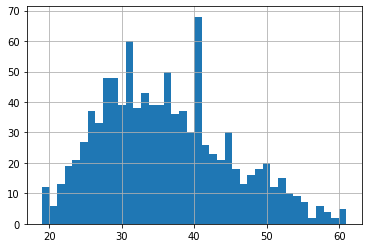

In [64]:
data['Age'].hist(bins=40)

We can tell that most of the users are 28 to 42 years old

##Age to Area Income jointplot

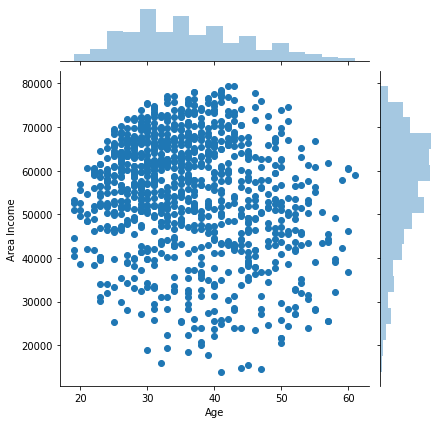

In [65]:
sns.jointplot(x='Age',y='Area Income', data = data )

We can also observe that users are mainly younger audience from rich nieghborhoods

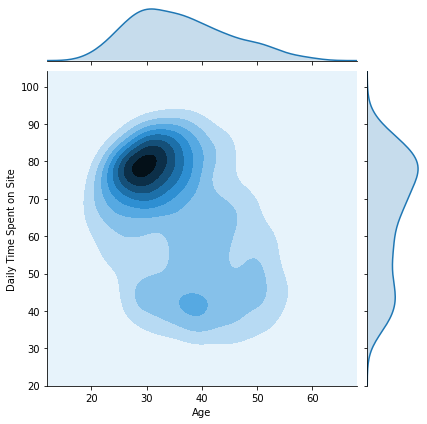

In [67]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data = data, kind='kde')

Most of users spend 70 to 90 minutes on site daily, which is quite satisfying result

##Daily Time Spent on Site to Daily Internet Usage jointplot

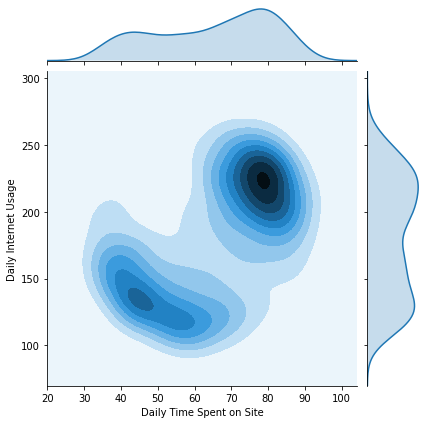

In [68]:
sns.jointplot(x='Daily Time Spent on Site' ,y ='Daily Internet Usage', data = data, kind='kde')

We can tell that most of users spend on our website about 30% of their time being online. This is also very good result.

#Pairplot with hue on Clicked on Ad column

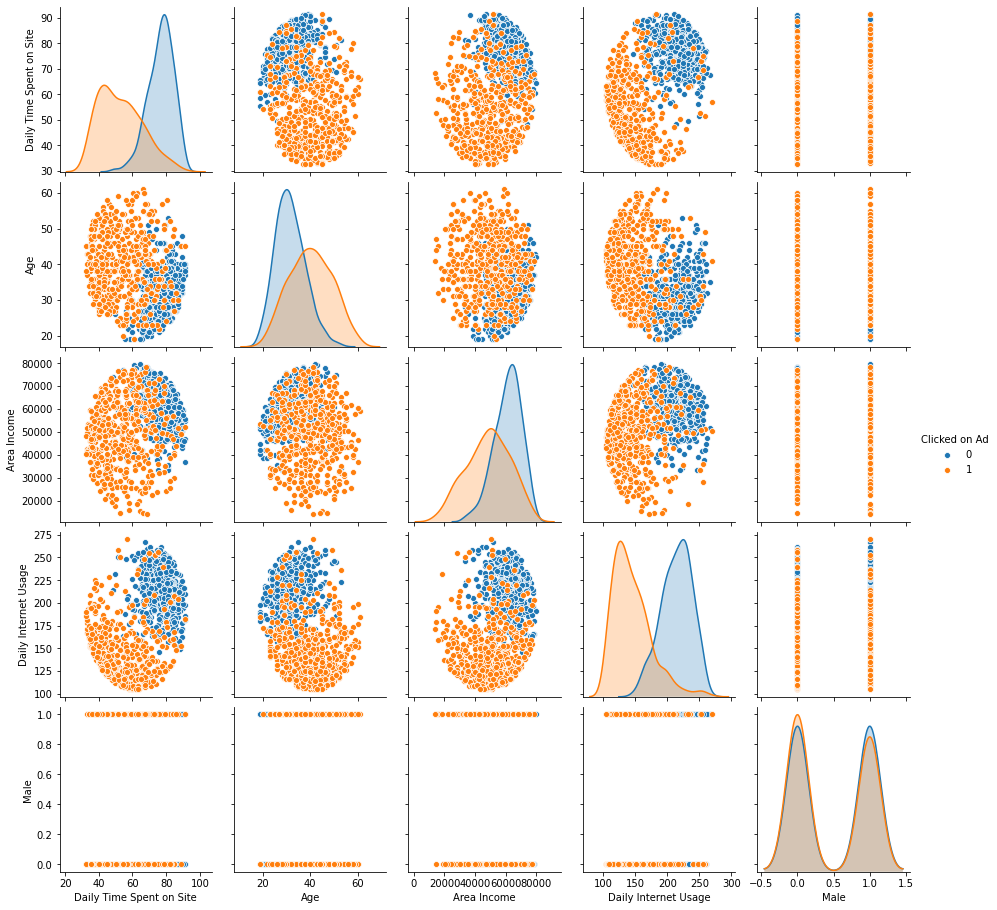

In [69]:
sns.pairplot(data=data,hue='Clicked on Ad')

From pairplot we can obseve that:

* people with median income are more likely to click on add
* middle-aged people are most likely to click on add
* there is no significant difference in clicking on add between male and 
female
* people with lower total time online ratio are more likely to click on add

#Handling missing values

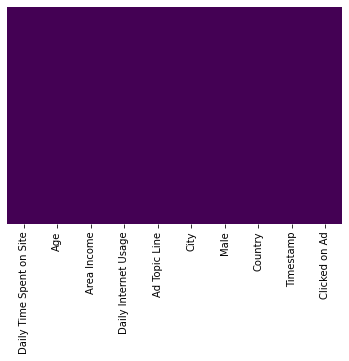

In [73]:
sns.heatmap(data.isnull(),yticklabels=False, cbar= False, cmap = 'viridis')

There is no missing data

#Handling categorical data

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [75]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


We can see that 4 columns of all require taking care of it

Let's see how varied labeling would be on each column

In [76]:
data.count()

Daily Time Spent on Site    1000
Age                         1000
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64

Total number of rows = 1000

##City

In [77]:
data['City'].nunique()

969

There is almost the same amount of cities as rows, so we can drop this column because it is insignificant. For further research we could add column such as amount of citizens of each city to define f.e. if people from bigger cities are more likely to click on add.

In [78]:
data.drop(['City'],inplace=True,axis=1)

##Country

In [79]:
data['Country'].nunique()

237

Country column could be significant so we should use Label Encoder

In [80]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data['Country'] = label.fit_transform(data['Country'].astype('str'))

In [81]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,215,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1,147,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,184,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,103,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,96,2016-06-03 03:36:18,0


##Ad Topic Line

In [82]:
data['Ad Topic Line'].nunique()

1000

Topic is surely insignificant so we can drop this column

In [83]:
data.drop(['Ad Topic Line'],inplace=True,axis=1)

##Timestamp

Because period of year could be significant, f.e. people visiting website in christmast period more likely could click on add. Also there is a possibility that people visiting website f.e. in the evening are also more likely to click on add. So we will divide timestamp column into a year, month, day, hour and minute.

In [84]:
data['Year'] = ''
data['Month'] = ''
data['Day'] = ''
data['Hour'] = ''
data['Minute'] = ''
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad,Year,Month,Day,Hour,Minute
0,68.95,35,61833.90,256.09,0,215,2016-03-27 00:53:11,0,,,,,
1,80.23,31,68441.85,193.77,1,147,2016-04-04 01:39:02,0,,,,,
2,69.47,26,59785.94,236.50,0,184,2016-03-13 20:35:42,0,,,,,
3,74.15,29,54806.18,245.89,1,103,2016-01-10 02:31:19,0,,,,,
4,68.37,35,73889.99,225.58,0,96,2016-06-03 03:36:18,0,,,,,


In [85]:
def year(Timestamp):

  datestring = Timestamp.split(' ')[0]
  year = int(datestring.split('-')[0])

  return year

def month(Timestamp):

  datestring = Timestamp.split(' ')[0]
  month = int(datestring.split('-')[1])

  return month

def day(Timestamp):

  datestring = Timestamp.split(' ')[0]
  day = int(datestring.split('-')[2])

  return day

def hour(Timestamp):

  hourstring = Timestamp.split(' ')[1]
  hour = int(hourstring.split(':')[0])

  return hour

def minute(Timestamp):

  hourstring = Timestamp.split(' ')[1]
  minute = int(hourstring.split(':')[1])

  return minute

In [86]:
data['Year'] = data['Timestamp'].apply(year)
data['Month'] = data['Timestamp'].apply(month)
data['Day'] = data['Timestamp'].apply(day)
data['Hour'] = data['Timestamp'].apply(hour)
data['Minute'] = data['Timestamp'].apply(minute)

In [87]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad,Year,Month,Day,Hour,Minute
0,68.95,35,61833.90,256.09,0,215,2016-03-27 00:53:11,0,2016,3,27,0,53
1,80.23,31,68441.85,193.77,1,147,2016-04-04 01:39:02,0,2016,4,4,1,39
2,69.47,26,59785.94,236.50,0,184,2016-03-13 20:35:42,0,2016,3,13,20,35
3,74.15,29,54806.18,245.89,1,103,2016-01-10 02:31:19,0,2016,1,10,2,31
4,68.37,35,73889.99,225.58,0,96,2016-06-03 03:36:18,0,2016,6,3,3,36


In [88]:
data.drop(['Timestamp'],inplace=True,axis=1)

In [89]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Year,Month,Day,Hour,Minute
0,68.95,35,61833.90,256.09,0,215,0,2016,3,27,0,53
1,80.23,31,68441.85,193.77,1,147,0,2016,4,4,1,39
2,69.47,26,59785.94,236.50,0,184,0,2016,3,13,20,35
3,74.15,29,54806.18,245.89,1,103,0,2016,1,10,2,31
4,68.37,35,73889.99,225.58,0,96,0,2016,6,3,3,36


Now we have perfect data set for machine learning modelling

#Logistic Regression

##Dependent and independent variables

In [94]:
X = data.loc[:, data.columns != 'Clicked on Ad']
y = pd.DataFrame(data['Clicked on Ad'])

In [91]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Year,Month,Day,Hour,Minute
0,68.95,35,61833.90,256.09,0,215,2016,3,27,0,53
1,80.23,31,68441.85,193.77,1,147,2016,4,4,1,39
2,69.47,26,59785.94,236.50,0,184,2016,3,13,20,35
3,74.15,29,54806.18,245.89,1,103,2016,1,10,2,31
4,68.37,35,73889.99,225.58,0,96,2016,6,3,3,36


In [95]:
y.head()

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0


##Splitting into test set and training set

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

##Training of logistic regression model

In [97]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Predicting dependent variables

In [98]:
predictions = logreg.predict(X_test)

In [99]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [100]:
y_test = np.array(y_test)
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

##Evaluation of model

##Confusion matrix

In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predictions)
cm

array([[155,   2],
       [  5, 138]])

In [102]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
total = TN + FP + FN + TP

accuracy = (TN+TP)/total
misclassification_rate = (FP+FN)/total

print('Accuracy: ', round(accuracy*100,2),'%')
print('Misclassification Rate: ', round(misclassification_rate*100,2),'%')

Accuracy:  97.67 %
Misclassification Rate:  2.33 %


##Classification report

In [56]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



As we can see we have very well fitted model. f1-score equals 98%. 